In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [224]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [225]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [226]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535491 entries, 0 to 1535490
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1535491 non-null  int64  
 1   kWh       1535491 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 23.4 MB


In [227]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1535486    0.13
1535487    0.13
1535488    0.13
1535489    0.13
1535490    0.13
Name: kWh, Length: 1535491, dtype: float64

In [228]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1535486    0.13
1535487    0.13
1535488    0.13
1535489    0.13
1535490    0.13
Name: kWh, Length: 1535491, dtype: float64

In [229]:
l=len(conso_data)-1
l

1535490

In [230]:
conso_data['sec']=conso_data['Interval']/1000


In [231]:
conso_data['Wh']=3600000/conso_data['Interval']


In [232]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [233]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535491 entries, 0 to 1535490
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1535491 non-null  int64  
 1   kWh        1535491 non-null  float64
 2   sec        1535491 non-null  float64
 3   Wh         1535491 non-null  float64
 4   cumul(ms)  1535491 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 58.6 MB


In [234]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1535486,27782,0.13,27.782,129.580304,38025700597
1535487,27748,0.13,27.748,129.739080,38025728345
1535488,28089,0.13,28.089,128.164050,38025756434
1535489,27624,0.13,27.624,130.321460,38025784058
1535490,27417,0.13,27.417,131.305394,38025811475


In [235]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

38025811475000

In [236]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 18, 43, 21, 504290)

In [237]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [238]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [239]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]



In [240]:
conso_data['dates']

0         2023-08-21 18:43:43.438290
1         2023-08-21 18:44:05.296290
2         2023-08-21 18:44:27.297290
3         2023-08-21 18:44:49.225290
4         2023-08-21 18:45:11.116290
                     ...            
1535486   2024-11-03 21:25:02.101290
1535487   2024-11-03 21:25:29.849290
1535488   2024-11-03 21:25:57.938290
1535489   2024-11-03 21:26:25.562290
1535490   2024-11-03 21:26:52.979290
Name: dates, Length: 1535491, dtype: datetime64[ns]

## créer les dates

In [241]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:43:43.438290,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:44:05.296290,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:44:27.297290,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:44:49.225290,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:45:11.116290,21/08/23
...,...,...,...,...,...,...,...
1535486,27782,0.13,27.782,129.580304,38025700597,2024-11-03 21:25:02.101290,03/11/24
1535487,27748,0.13,27.748,129.739080,38025728345,2024-11-03 21:25:29.849290,03/11/24
1535488,28089,0.13,28.089,128.164050,38025756434,2024-11-03 21:25:57.938290,03/11/24
1535489,27624,0.13,27.624,130.321460,38025784058,2024-11-03 21:26:25.562290,03/11/24


### save conso_data with dates

In [242]:
to_csv('conso_data_with_dates.csv',conso_data)

# tranche journalière


In [243]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('03/11/24', 3, 11, 2024)

In [244]:
here = now.strftime('%H:%M:%S')
here

'21:27:46'

In [245]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [246]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2815 entries, 1532676 to 1535490
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2815 non-null   int64         
 1   kWh        2815 non-null   float64       
 2   sec        2815 non-null   float64       
 3   Wh         2815 non-null   float64       
 4   cumul(ms)  2815 non-null   int64         
 5   dates      2815 non-null   datetime64[ns]
 6   days       2815 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 175.9+ KB


In [247]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [248]:
data = list(df_grp['kWh'])
print(data)

[0.883, 3.699, 4.225, 3.691, 4.206, 4.626, 3.491, 3.396, 3.531, 3.683, 3.83, 3.728, 4.257, 3.85, 3.428, 3.631, 3.326, 3.448, 4.239, 4.011, 4.062, 3.897, 3.432, 4.485, 3.702, 3.82, 4.405, 4.663, 3.735, 3.224, 3.172, 4.046, 3.634, 3.182, 3.792, 4.173, 3.742, 3.558, 4.813, 4.168, 4.54, 3.774, 3.384, 4.315, 3.882, 3.877, 3.432, 4.076, 3.65, 3.404, 4.112, 3.4, 3.889, 3.83, 3.648, 3.746, 4.244, 3.287, 3.88, 2.962, 2.056, 2.041, 2.478, 4.085, 3.738, 4.324, 3.636, 3.898, 3.745, 3.957, 3.94, 4.135, 3.671, 3.128, 3.796, 3.545, 3.594, 3.704, 3.686, 3.233, 3.908, 3.264, 3.748, 3.588, 4.099, 3.675, 3.263, 3.826, 4.066, 4.385, 4.084, 4.0, 4.22, 3.743, 3.932, 3.875, 3.91, 3.751, 4.036, 4.337, 3.882, 3.532, 3.66, 3.67, 3.338, 3.856, 3.986, 4.12, 3.464, 4.178, 3.605, 4.125, 4.496, 3.691, 3.412, 3.592, 4.189, 3.654, 4.079, 3.981, 3.755, 3.581, 5.143, 3.698, 3.761, 4.299, 4.086, 4.776, 4.395, 3.942, 3.805, 4.373, 4.634, 4.237, 4.776, 4.345, 3.668, 4.235, 3.685, 3.613, 3.528, 3.968, 3.639, 3.789, 3.59, 3.

In [249]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [250]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [251]:
df = conso_data
len(df)

1535491

In [252]:
period(p=2)

2023-08-22 00:49:57.241290	2023-08-22 07:54:12.861290	7h 4m 15s 	2000


In [253]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.291486
dtype: float64

In [254]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.481839
dtype: float64

In [255]:
last=df_grp.iloc[-1]['kWh']
last

2.815

In [256]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2815 entries, 1532676 to 1535490
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2815 non-null   int64         
 1   kWh        2815 non-null   float64       
 2   sec        2815 non-null   float64       
 3   Wh         2815 non-null   float64       
 4   cumul(ms)  2815 non-null   int64         
 5   dates      2815 non-null   datetime64[ns]
 6   days       2815 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 175.9+ KB


In [257]:
# select day
day = today
#day = '16/08/24'


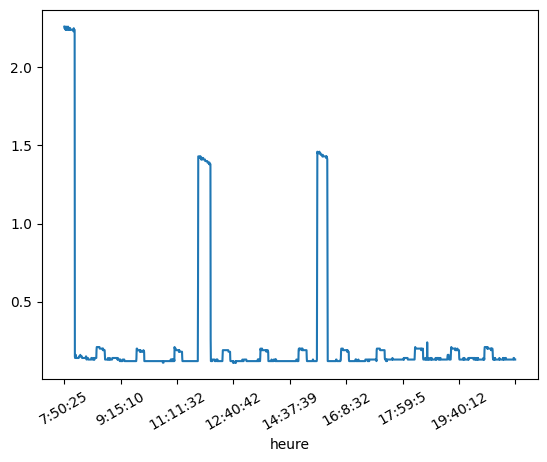

In [258]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [259]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:43:43.438290,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:44:05.296290,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:44:27.297290,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:44:49.225290,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:45:11.116290,21/08/23
...,...,...,...,...,...,...,...
1535486,27782,0.13,27.782,129.580304,38025700597,2024-11-03 21:25:02.101290,03/11/24
1535487,27748,0.13,27.748,129.739080,38025728345,2024-11-03 21:25:29.849290,03/11/24
1535488,28089,0.13,28.089,128.164050,38025756434,2024-11-03 21:25:57.938290,03/11/24
1535489,27624,0.13,27.624,130.321460,38025784058,2024-11-03 21:26:25.562290,03/11/24


In [260]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:2,39497,0.09,39.497,91.146163,37948600720,2024-11-03 00:00:02.224290,03/11/24
0:0:41,39436,0.09,39.436,91.287149,37948640156,2024-11-03 00:00:41.660290,03/11/24
0:1:20,38819,0.09,38.819,92.738092,37948678975,2024-11-03 00:01:20.479290,03/11/24
0:1:42,21577,0.17,21.577,166.844325,37948700552,2024-11-03 00:01:42.056290,03/11/24
0:2:3,21242,0.17,21.242,169.475567,37948721794,2024-11-03 00:02:03.298290,03/11/24
...,...,...,...,...,...,...,...
21:25:2,27782,0.13,27.782,129.580304,38025700597,2024-11-03 21:25:02.101290,03/11/24
21:25:29,27748,0.13,27.748,129.739080,38025728345,2024-11-03 21:25:29.849290,03/11/24
21:25:57,28089,0.13,28.089,128.164050,38025756434,2024-11-03 21:25:57.938290,03/11/24


In [261]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 02/11/24 4.084
Min : 11/10/24 1.785


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1532676,39497,0.09,39.497,91.146163,37948600720,2024-11-03 00:00:02.224290,03/11/24,0:0:2
1532677,39436,0.09,39.436,91.287149,37948640156,2024-11-03 00:00:41.660290,03/11/24,0:0:41
1532678,38819,0.09,38.819,92.738092,37948678975,2024-11-03 00:01:20.479290,03/11/24,0:1:20
1532679,21577,0.17,21.577,166.844325,37948700552,2024-11-03 00:01:42.056290,03/11/24,0:1:42
1532680,21242,0.17,21.242,169.475567,37948721794,2024-11-03 00:02:03.298290,03/11/24,0:2:3
...,...,...,...,...,...,...,...,...
1535486,27782,0.13,27.782,129.580304,38025700597,2024-11-03 21:25:02.101290,03/11/24,21:25:2
1535487,27748,0.13,27.748,129.739080,38025728345,2024-11-03 21:25:29.849290,03/11/24,21:25:29
1535488,28089,0.13,28.089,128.164050,38025756434,2024-11-03 21:25:57.938290,03/11/24,21:25:57
1535489,27624,0.13,27.624,130.321460,38025784058,2024-11-03 21:26:25.562290,03/11/24,21:26:25


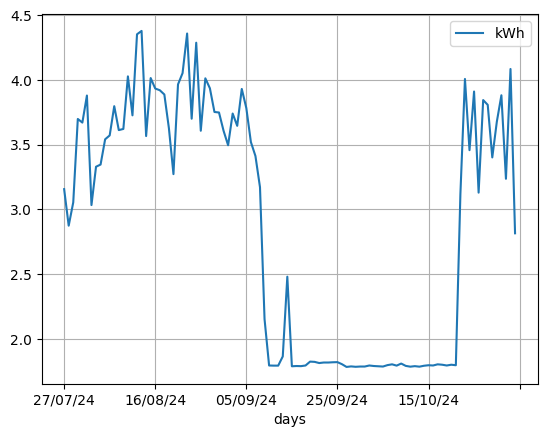

In [262]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-11-03 00:00:02.224290	2024-11-03 08:45:49.853290	8h 45m 47s 	1000
2024-11-03 08:45:49.853290	2024-11-03 15:40:25.128290	6h 54m 35s 	2000
2024-11-03 15:40:25.128290	2024-11-03 21:26:52.979290	5h 46m 27s 	815
<class 'pandas.core.frame.DataFrame'>
Index: 2815 entries, 1532676 to 1535490
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2815 non-null   int64         
 1   kWh        2815 non-null   float64       
 2   sec        2815 non-null   float64       
 3   Wh         2815 non-null   float64       
 4   cumul(ms)  2815 non-null   int64         
 5   dates      2815 non-null   datetime64[ns]
 6   days       2815 non-null   object        
 7   heure      2815 non-null   object        
 8   hours      2815 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 219.9+ KB


('03/11/24', <Axes: xlabel='hours'>)

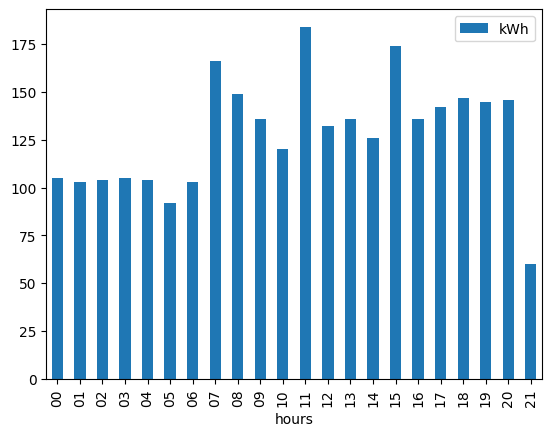

In [263]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [264]:
df_grp

,kWh
days,
21/08/23,0.883
22/08/23,3.699
23/08/23,4.225
24/08/23,3.691
25/08/23,4.206
...,...
30/10/24,3.677
31/10/24,3.881
01/11/24,3.236


In [265]:
# select number of days to display
span = 30
#df_grp.tail(span)


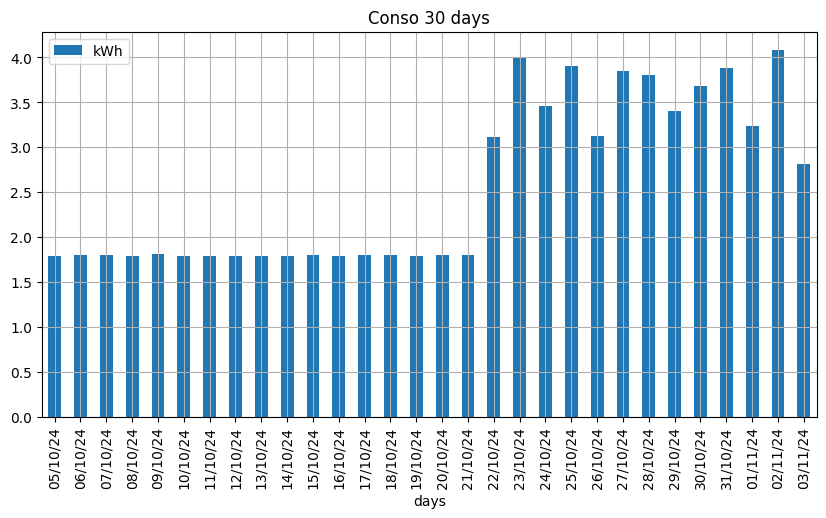

In [266]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


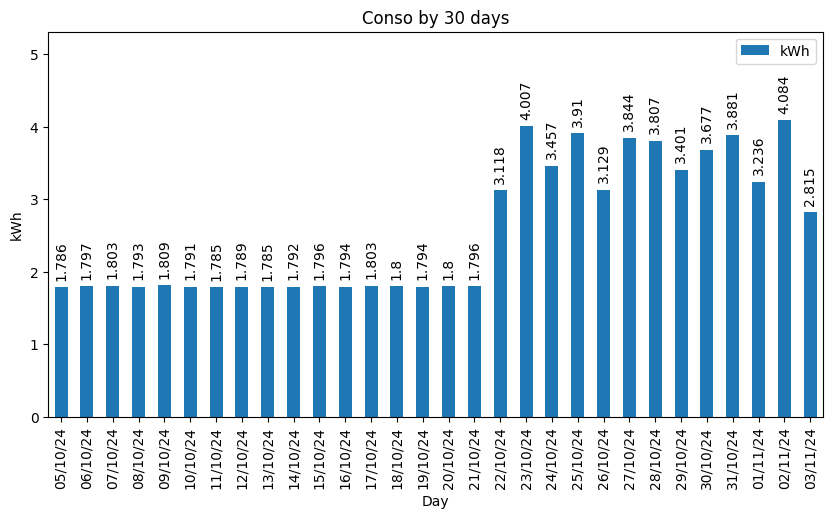

In [267]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [268]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
05/10/24    1.786
06/10/24    1.797
07/10/24    1.803
08/10/24    1.793
09/10/24    1.809
10/10/24    1.791
11/10/24    1.785
12/10/24    1.789
13/10/24    1.785
14/10/24    1.792
15/10/24    1.796
16/10/24    1.794
17/10/24    1.803
18/10/24    1.800
19/10/24    1.794
20/10/24    1.800
21/10/24    1.796
22/10/24    3.118
23/10/24    4.007
24/10/24    3.457
25/10/24    3.910
26/10/24    3.129
27/10/24    3.844
28/10/24    3.807
29/10/24    3.401
30/10/24    3.677
31/10/24    3.881
01/11/24    3.236
02/11/24    4.084
03/11/24    2.815
Name: kWh, dtype: float64

In [269]:
x_labels=df_grp.tail(span).index
x_labels

Index(['05/10/24', '06/10/24', '07/10/24', '08/10/24', '09/10/24', '10/10/24',
       '11/10/24', '12/10/24', '13/10/24', '14/10/24', '15/10/24', '16/10/24',
       '17/10/24', '18/10/24', '19/10/24', '20/10/24', '21/10/24', '22/10/24',
       '23/10/24', '24/10/24', '25/10/24', '26/10/24', '27/10/24', '28/10/24',
       '29/10/24', '30/10/24', '31/10/24', '01/11/24', '02/11/24', '03/11/24'],
      dtype='object', name='days')

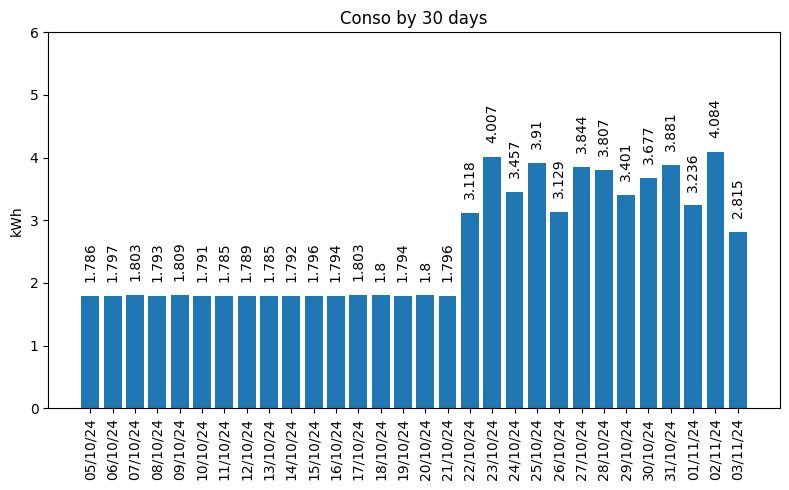

In [270]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [271]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

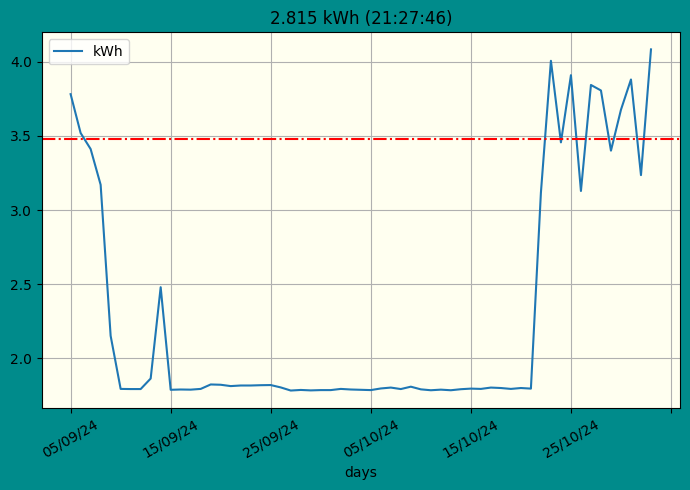

In [272]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

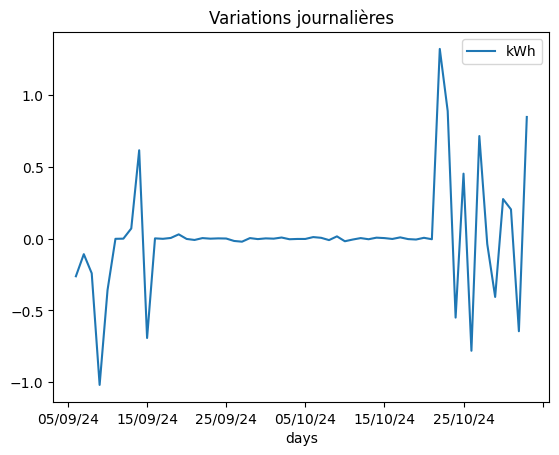

In [273]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [274]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:43:43.438290,21/08/23,18
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:44:05.296290,21/08/23,18
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:44:27.297290,21/08/23,18
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:44:49.225290,21/08/23,18
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:45:11.116290,21/08/23,18
...,...,...,...,...,...,...,...,...
1535486,27782,0.13,27.782,129.580304,38025700597,2024-11-03 21:25:02.101290,03/11/24,21
1535487,27748,0.13,27.748,129.739080,38025728345,2024-11-03 21:25:29.849290,03/11/24,21
1535488,28089,0.13,28.089,128.164050,38025756434,2024-11-03 21:25:57.938290,03/11/24,21
1535489,27624,0.13,27.624,130.321460,38025784058,2024-11-03 21:26:25.562290,03/11/24,21


In [275]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [276]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [277]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [278]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [279]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,883
22/08/23,3699
23/08/23,4225
24/08/23,3691
25/08/23,4206
...,...
30/10/24,3677
31/10/24,3881
01/11/24,3236


In [280]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:43:43.438290,21/08/23,18
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:44:05.296290,21/08/23,18
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:44:27.297290,21/08/23,18
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:44:49.225290,21/08/23,18
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:45:11.116290,21/08/23,18
...,...,...,...,...,...,...,...,...
1535486,27782,0.13,27.782,129.580304,38025700597,2024-11-03 21:25:02.101290,03/11/24,21
1535487,27748,0.13,27.748,129.739080,38025728345,2024-11-03 21:25:29.849290,03/11/24,21
1535488,28089,0.13,28.089,128.164050,38025756434,2024-11-03 21:25:57.938290,03/11/24,21
1535489,27624,0.13,27.624,130.321460,38025784058,2024-11-03 21:26:25.562290,03/11/24,21


In [281]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 18    0        21/08/23    18  0.16
               1        21/08/23    18  0.16
               2        21/08/23    18  0.16
               3        21/08/23    18  0.16
               4        21/08/23    18  0.16
...                          ...   ...   ...
03/11/24 21    1535486  03/11/24    21  0.13
               1535487  03/11/24    21  0.13
               1535488  03/11/24    21  0.13
               1535489  03/11/24    21  0.13
               1535490  03/11/24    21  0.13

[1535491 rows x 3 columns]

In [282]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [283]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '18'), ('21/08/23', '19'), ('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '18'), ('22/08/23', '19'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('23/08/23', '18'), ('23/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/2

In [284]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,883,883
22/08/23,3699,3699
23/08/23,4225,4225
24/08/23,3691,3691
25/08/23,4206,4206
...,...,...
30/10/24,3677,3677
31/10/24,3881,3881
01/11/24,3236,3236


In [285]:
grp_by_day['kWh'].cumsum()

days
21/08/23        883
22/08/23       4582
23/08/23       8807
24/08/23      12498
25/08/23      16704
             ...   
30/10/24    1521475
31/10/24    1525356
01/11/24    1528592
02/11/24    1532676
03/11/24    1535491
Name: kWh, Length: 441, dtype: int64

In [286]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 18      45
         19     275
         20     167
         21     130
         22     132
...             ...
03/11/24 17     142
         18     147
         19     145
         20     146
         21      60

[10564 rows x 1 columns]

In [287]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  18            45
          19           320
          20           487
          21           617
          22           749
                    ...   
03/11/24  17       1534993
          18       1535140
          19       1535285
          20       1535431
          21       1535491
Name: kWh, Length: 10564, dtype: int64

In [288]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 18      45      45    NaN
         19     275     320  230.0
         20     167     487 -108.0
         21     130     617  -37.0
         22     132     749    2.0
...             ...     ...    ...
03/11/24 17     142    2317    6.0
         18     147    2464    5.0
         19     145    2609   -2.0
         20     146    2755    1.0
         21      60    2815  -86.0

[10564 rows x 3 columns]

In [289]:
today, grp_by_dayhours.loc[today]

('03/11/24',
        kWh  cumsum  diff
 hours                   
 00     105     105   NaN
 01     103     208  -2.0
 02     104     312   1.0
 03     105     417   1.0
 04     104     521  -1.0
 05      92     613 -12.0
 06     103     716  11.0
 07     166     882  63.0
 08     149    1031 -17.0
 09     136    1167 -13.0
 10     120    1287 -16.0
 11     184    1471  64.0
 12     132    1603 -52.0
 13     136    1739   4.0
 14     126    1865 -10.0
 15     174    2039  48.0
 16     136    2175 -38.0
 17     142    2317   6.0
 18     147    2464   5.0
 19     145    2609  -2.0
 20     146    2755   1.0
 21      60    2815 -86.0)

Text(0.5, 1.0, 'Cumul journalier')

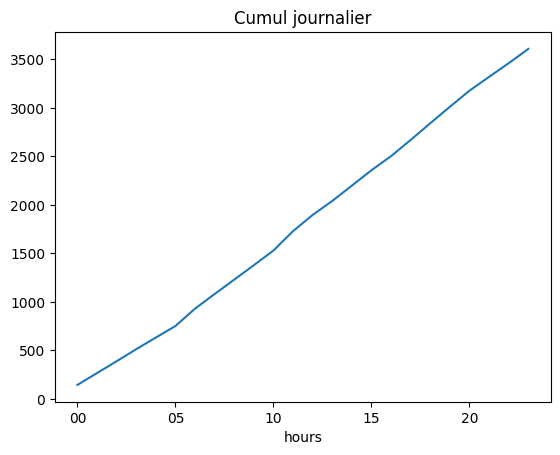

In [290]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

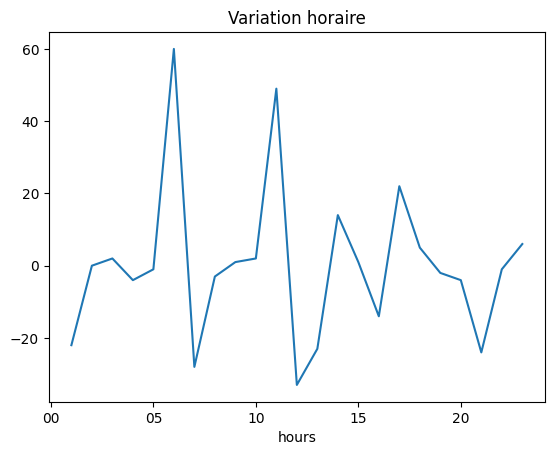

In [291]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [292]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

441

Text(0.5, 1.0, '441 days')

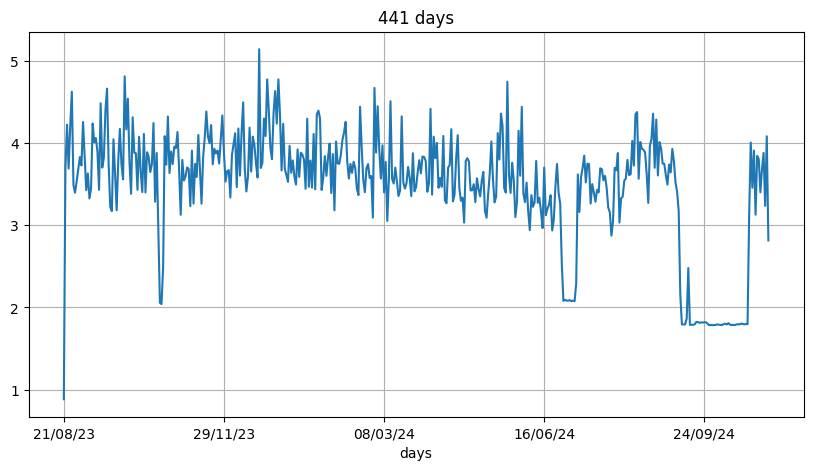

In [293]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '100 days')

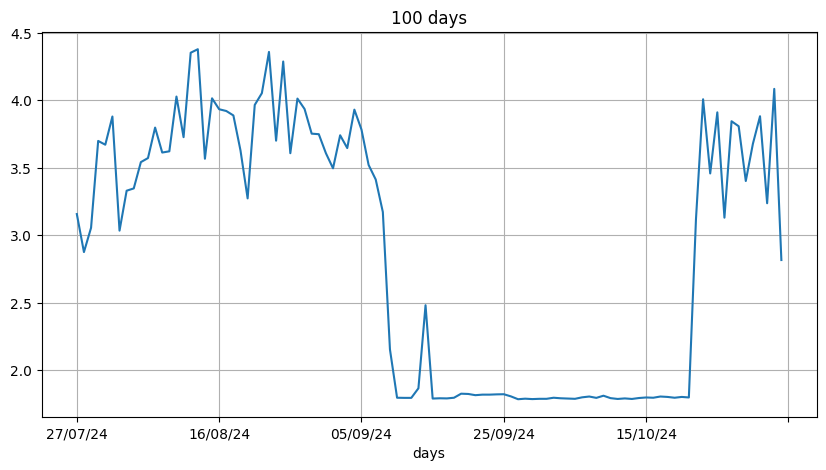

In [294]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [295]:
df_grp.tail(span)['kWh']

days
27/07/24    3.156
28/07/24    2.874
29/07/24    3.054
30/07/24    3.698
31/07/24    3.670
            ...  
30/10/24    3.677
31/10/24    3.881
01/11/24    3.236
02/11/24    4.084
03/11/24    2.815
Name: kWh, Length: 100, dtype: float64

In [296]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,105,105,NaN
01,103,208,-2.0
02,104,312,1.0
03,105,417,1.0
04,104,521,-1.0
05,92,613,-12.0
06,103,716,11.0
07,166,882,63.0
08,149,1031,-17.0


In [297]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


22

In [298]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 23)

In [299]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [300]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22.])

In [301]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
19    20.0
20    21.0
21    22.0
Name: days, dtype: float64

In [302]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [303]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 00 to 21
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     22 non-null     int64  
 1   cumsum  22 non-null     int64  
 2   diff    21 non-null     float64
 3   days    22 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 880.0+ bytes


In [304]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
19    20.0
20    21.0
21    22.0
Name: days, dtype: float64

In [305]:
day

'03/11/24'

In [306]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,105,105,NaN,1.0
01,103,208,-2.0,2.0
02,104,312,1.0,3.0
03,105,417,1.0,4.0
04,104,521,-1.0,5.0
05,92,613,-12.0,6.0
06,103,716,11.0,7.0
07,166,882,63.0,8.0
08,149,1031,-17.0,9.0


Text(0.5, 1.0, '03/11/24')

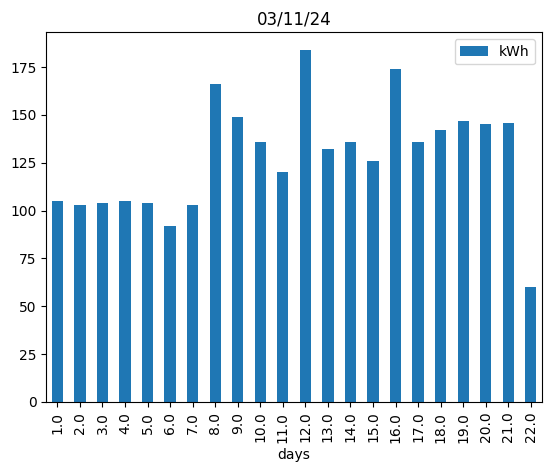

In [307]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [308]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21'],
      dtype='object', name='hours')

# Conso du jour


In [309]:
groupedbyhour.count()

,kWh
hours,
00,105
01,103
02,104
03,105
04,104
05,92
06,103
07,166
08,149


In [310]:
day = '13/09/24'
#day = today
grp_by_dayhours.loc[day].kWh

hours
00     77
01     76
02     78
03     77
04     76
05     76
06     76
07     74
08     73
09     73
10     73
11     73
12     73
13     73
14     73
15     74
16     73
17     73
18     73
19     76
20     76
21     86
22    105
23    107
Name: kWh, dtype: int64

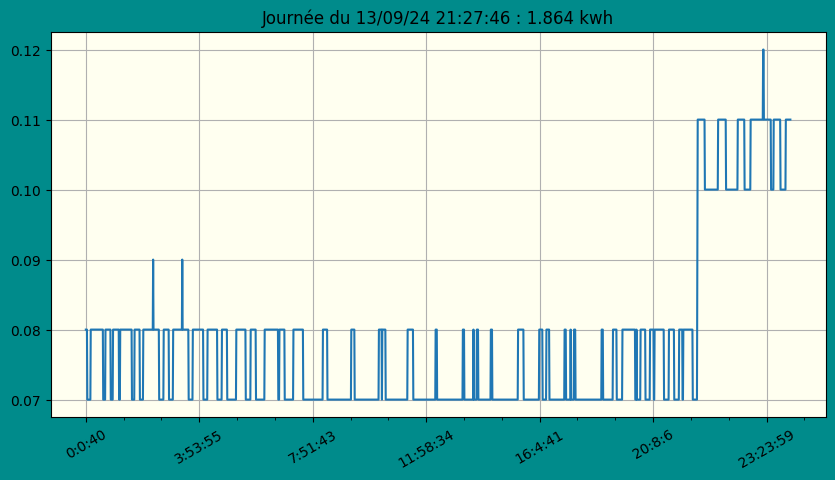

In [311]:
show('13/09/24',bgcolor='ivory')

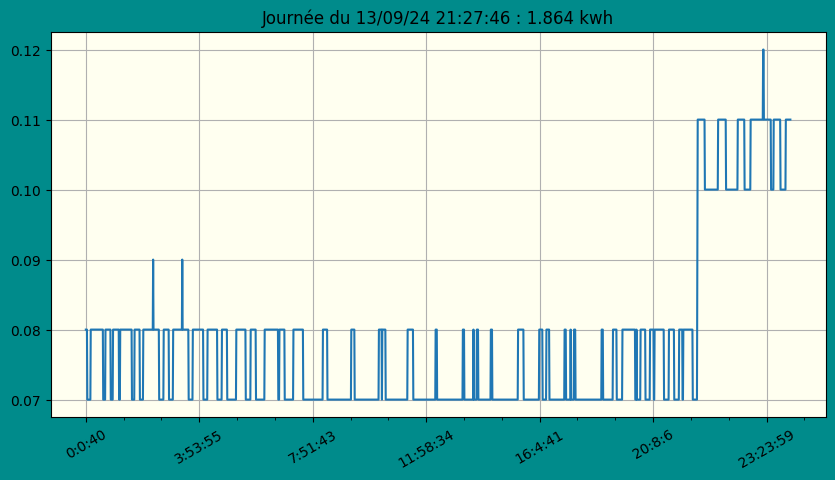

In [312]:
show(day,bgcolor='ivory')

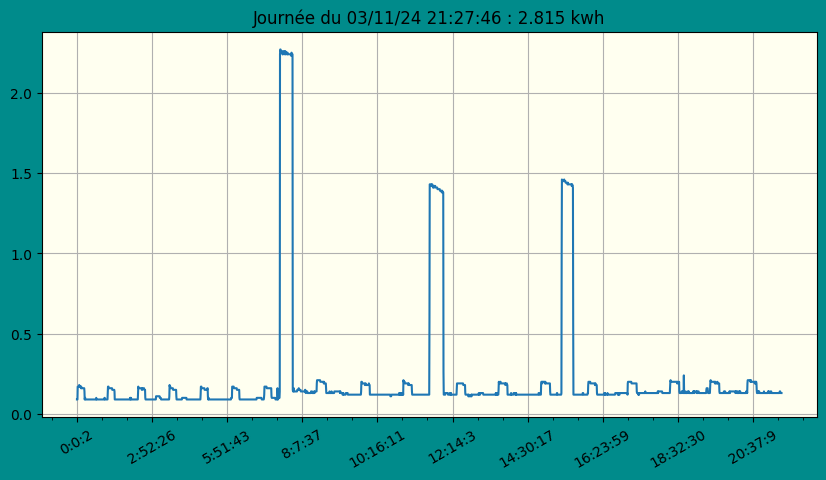

In [313]:
# retour vietnam 22/10/2024
show(today,bgcolor='ivory')

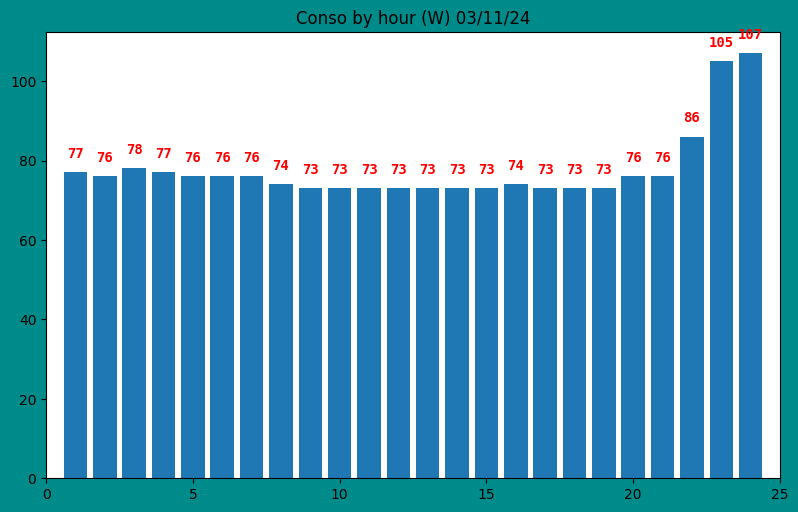

In [314]:
# conso by hour
#data = groupedbyhour.count().kWh
data = grp_by_dayhours.loc[day].kWh

# len(groupedbyhour)
x = np.arange(1,len(data)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
#plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {today}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [315]:
diff = grp_by_dayhours.loc[day]
diff


,kWh,cumsum,diff,days
hours,,,,
00,77,77,NaN,NaN
01,76,153,-1.0,NaN
02,78,231,2.0,NaN
03,77,308,-1.0,NaN
04,76,384,-1.0,NaN
05,76,460,0.0,NaN
06,76,536,0.0,NaN
07,74,610,-2.0,NaN
08,73,683,-1.0,NaN


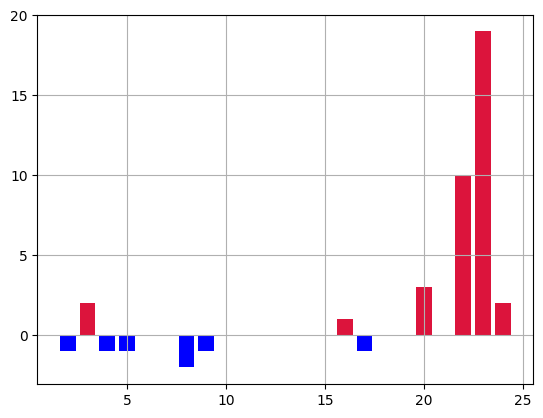

In [316]:
xx = np.arange(1,len(diff)+1)
plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

<Axes: xlabel='hours'>

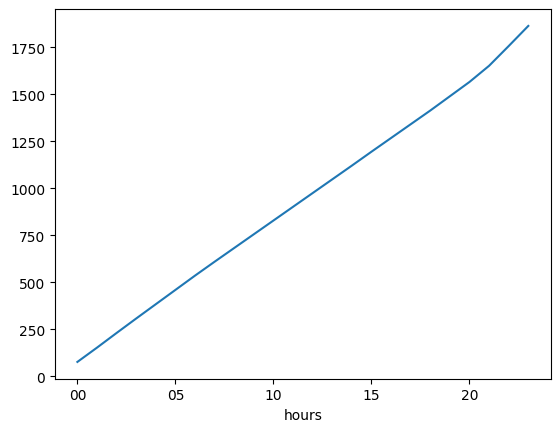

In [317]:
data.cumsum().plot()


<Axes: xlabel='hours'>

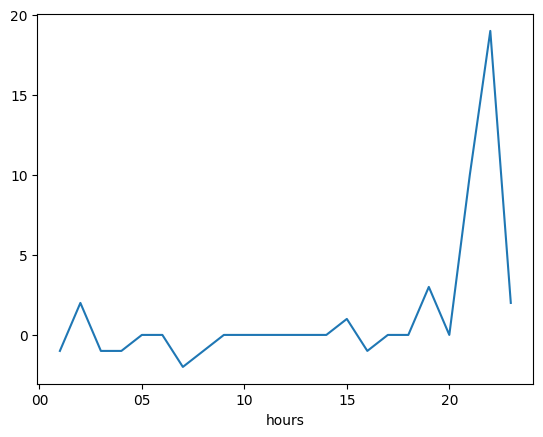

In [318]:
data.diff().plot()

# Test

In [319]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_data_with_dates.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp1612

In [320]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_data_with_dates.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [321]:
#conso_byhour(day)

In [322]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

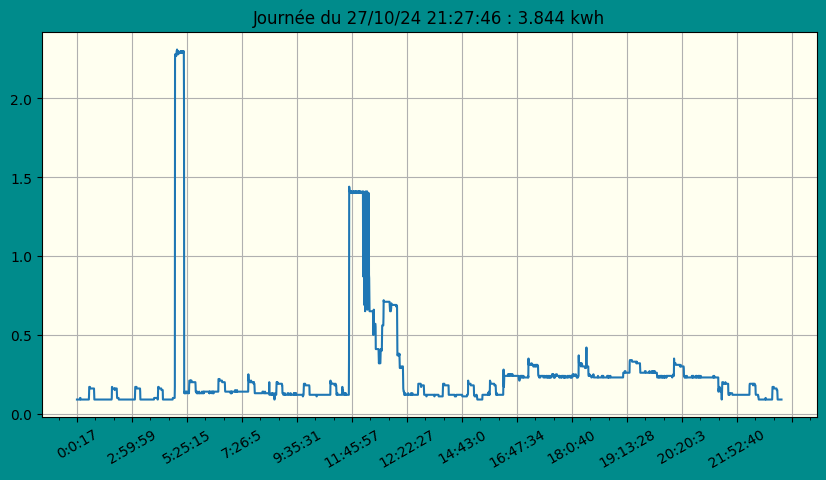

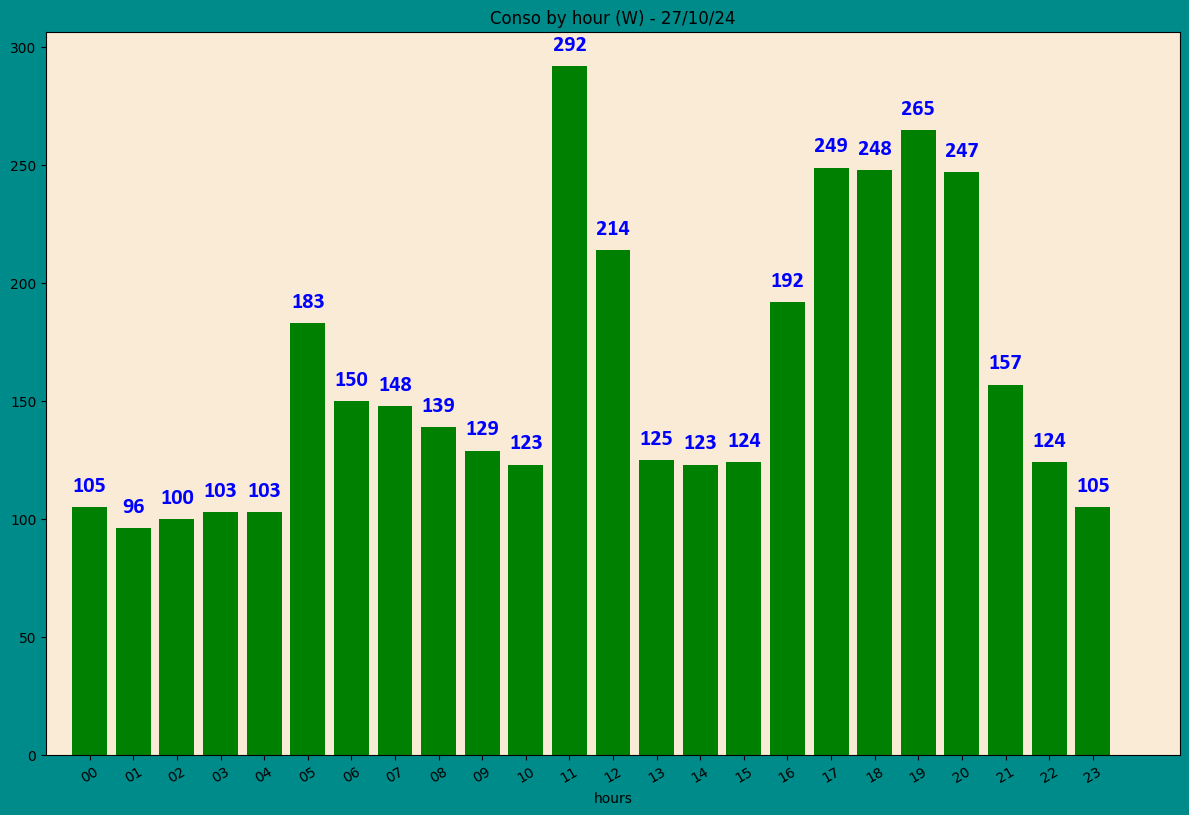

In [323]:
# plot any day
day = '27/10/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

<Axes: xlabel='days'>

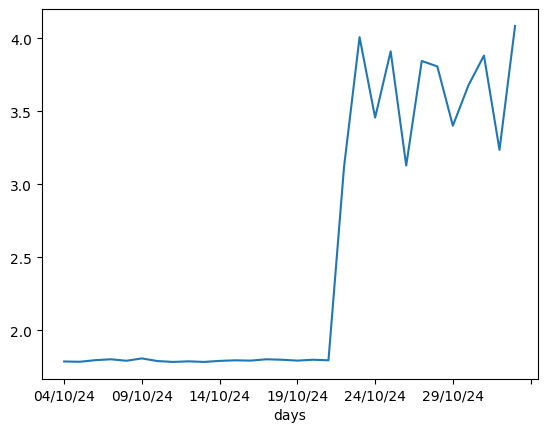

In [324]:
month.plot()


In [325]:
month

days
04/10/24    1.788
05/10/24    1.786
06/10/24    1.797
07/10/24    1.803
08/10/24    1.793
09/10/24    1.809
10/10/24    1.791
11/10/24    1.785
12/10/24    1.789
13/10/24    1.785
14/10/24    1.792
15/10/24    1.796
16/10/24    1.794
17/10/24    1.803
18/10/24    1.800
19/10/24    1.794
20/10/24    1.800
21/10/24    1.796
22/10/24    3.118
23/10/24    4.007
24/10/24    3.457
25/10/24    3.910
26/10/24    3.129
27/10/24    3.844
28/10/24    3.807
29/10/24    3.401
30/10/24    3.677
31/10/24    3.881
01/11/24    3.236
02/11/24    4.084
Name: kWh, dtype: float64

In [326]:
month

days
04/10/24    1.788
05/10/24    1.786
06/10/24    1.797
07/10/24    1.803
08/10/24    1.793
09/10/24    1.809
10/10/24    1.791
11/10/24    1.785
12/10/24    1.789
13/10/24    1.785
14/10/24    1.792
15/10/24    1.796
16/10/24    1.794
17/10/24    1.803
18/10/24    1.800
19/10/24    1.794
20/10/24    1.800
21/10/24    1.796
22/10/24    3.118
23/10/24    4.007
24/10/24    3.457
25/10/24    3.910
26/10/24    3.129
27/10/24    3.844
28/10/24    3.807
29/10/24    3.401
30/10/24    3.677
31/10/24    3.881
01/11/24    3.236
02/11/24    4.084
Name: kWh, dtype: float64

In [327]:
# date with max conso in 1 month
month.idxmax()

'02/11/24'

In [328]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'02/11/24'

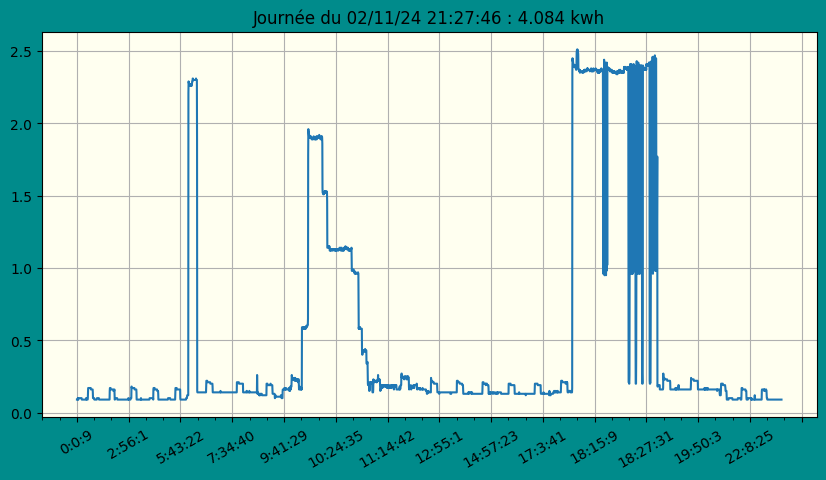

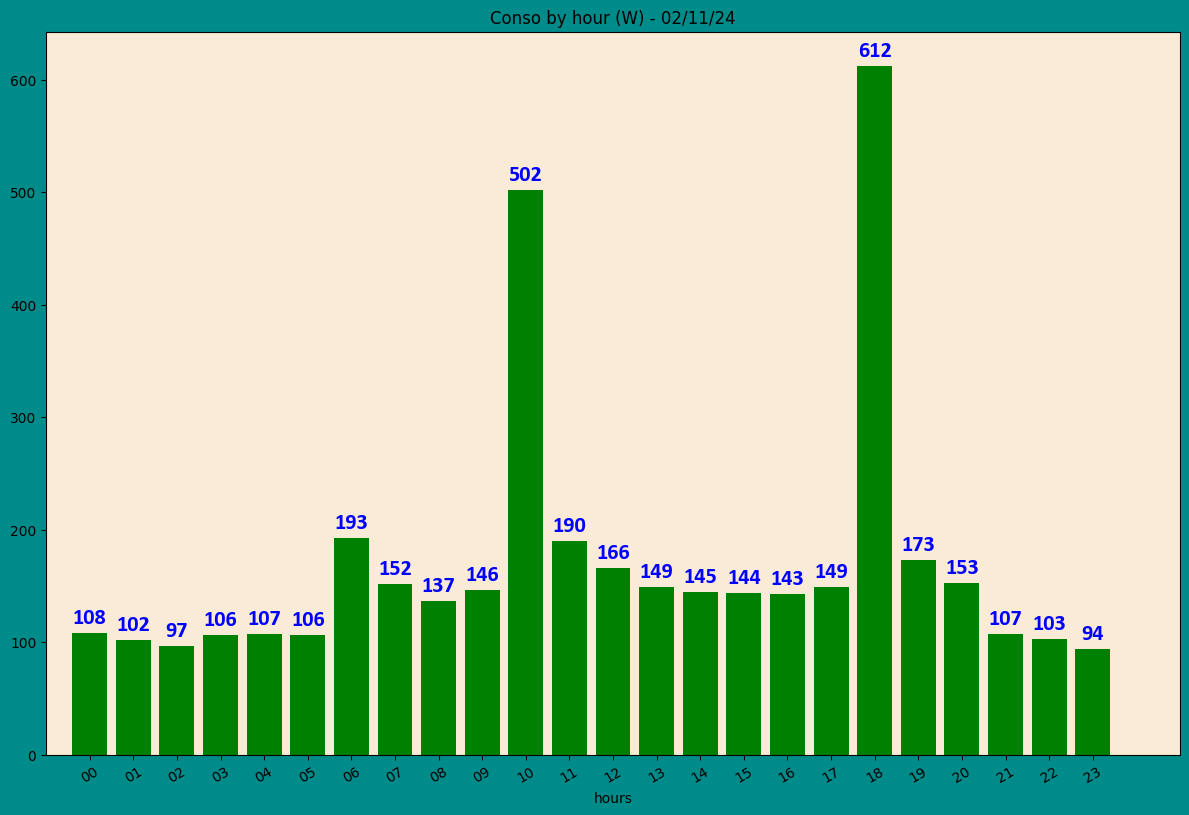

In [329]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [330]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,108,108,NaN,NaN
01,102,210,-6.0,NaN
02,97,307,-5.0,NaN
03,106,413,9.0,NaN
04,107,520,1.0,NaN
05,106,626,-1.0,NaN
06,193,819,87.0,NaN
07,152,971,-41.0,NaN
08,137,1108,-15.0,NaN


In [331]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

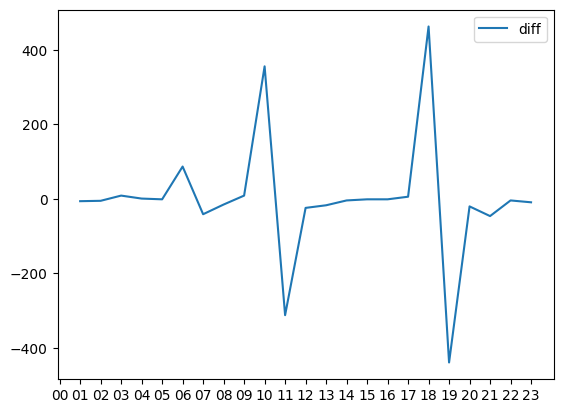

In [332]:
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

In [333]:
# 41 s
# file to big to git sync

# create .gitignore
filename='conso_data.csv'
#conso_data.to_csv(filename)